In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:

#importing the dataset from the url
df = "https://ontario.ca/v1/files/fuel-prices/pumppricesall.csv"
data = pd.read_csv(df)
#renaming the columns for better understanding
data.columns= ["Date", "Pump Price", "Crude Cost", "Federal Excise Tax", "Federal Carbon Tax", " Ontario Tax", "GST/HST", "Wholesale Margin", "Retail Margin", "Region"]
#counting the number of missing values
na_count = data.isna().sum()
print(na_count) #there are no missing values in the dataset






Date                  0
Pump Price            0
Crude Cost            0
Federal Excise Tax    0
Federal Carbon Tax    0
 Ontario Tax          0
GST/HST               0
Wholesale Margin      0
Retail Margin         0
Region                0
dtype: int64


In [3]:
# Brief overview of Toronto data

toronto_data = data[data["Region"] == "Toronto"]
# Only using data with Toronto region and excluding the date and region columns
toronto_numeric_data = toronto_data.drop(columns=["Date", "Region"])
toronto_mean_values = toronto_numeric_data.mean()
toronto_min_values = toronto_numeric_data.min()
toronto_max_values = toronto_numeric_data.max()
toronto_first_quartile = toronto_numeric_data.quantile(0.25)
toronto_third_quartile = toronto_numeric_data.quantile(0.75)

print("Mean Values: \n", toronto_mean_values, "\n\n", "Min Values: \n", toronto_min_values, "\n\n", "Max Values: \n", toronto_max_values, "\n\n", "First Quartile: \n", toronto_first_quartile, "\n\n", "Third Quartile: \n", toronto_third_quartile)




Mean Values: 
 Pump Price            89.135683
Crude Cost            35.542952
Federal Excise Tax     9.499119
Federal Carbon Tax     1.466079
 Ontario Tax          13.752643
GST/HST                8.073789
Wholesale Margin      14.882159
Retail Margin          5.924449
dtype: float64 

 Min Values: 
 Pump Price            43.1
Crude Cost            10.3
Federal Excise Tax     4.5
Federal Carbon Tax     0.0
 Ontario Tax           8.3
GST/HST                3.1
Wholesale Margin       3.4
Retail Margin         -2.3
dtype: float64 

 Max Values: 
 Pump Price            207.2
Crude Cost             95.3
Federal Excise Tax     10.0
Federal Carbon Tax     17.6
 Ontario Tax           14.7
GST/HST                23.8
Wholesale Margin       44.7
Retail Margin          12.3
dtype: float64 

 First Quartile: 
 Pump Price            55.2
Crude Cost            16.0
Federal Excise Tax    10.0
Federal Carbon Tax     0.0
 Ontario Tax          14.7
GST/HST                3.6
Wholesale Margin       7.9


In [6]:
toronto_numeric_data.describe()

,Pump Price,Crude Cost,Federal Excise Tax,Federal Carbon Tax,Ontario Tax,GST/HST,Wholesale Margin,Retail Margin
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,89.135683,35.542952,9.499119,1.466079,13.752643,8.073789,14.882159,5.924449
std,35.196294,19.598960,1.105255,3.877033,2.032154,5.289762,8.458015,2.562964
min,43.100000,10.300000,4.500000,0.000000,8.300000,3.100000,3.400000,-2.300000
25%,55.200000,16.000000,10.000000,0.000000,14.700000,3.600000,7.900000,4.100000
50%,84.900000,33.050000,10.000000,0.000000,14.700000,4.800000,11.600000,6.100000
75%,116.900000,50.050000,10.000000,0.000000,14.700000,13.300000,21.075000,7.500000
max,207.200000,95.300000,10.000000,17.600000,14.700000,23.800000,44.700000,12.300000


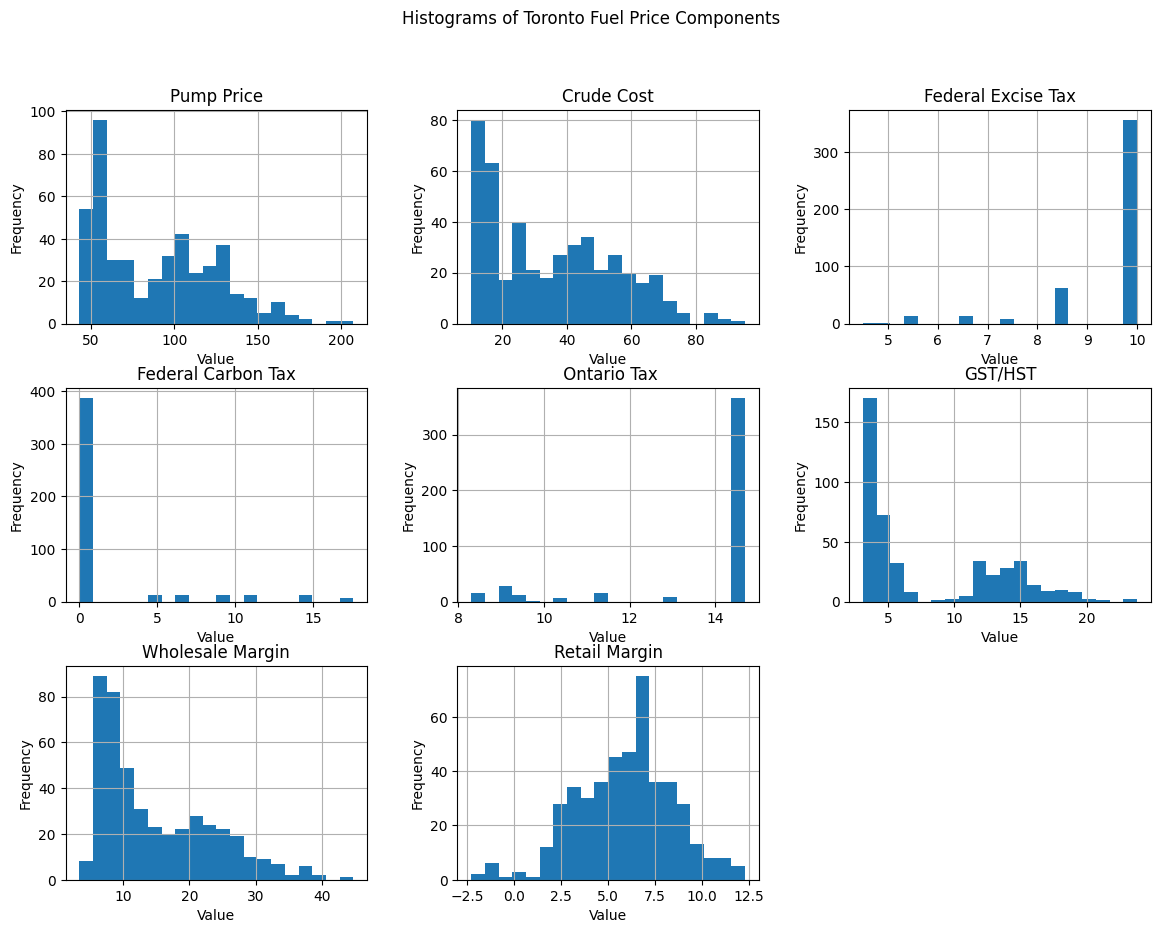

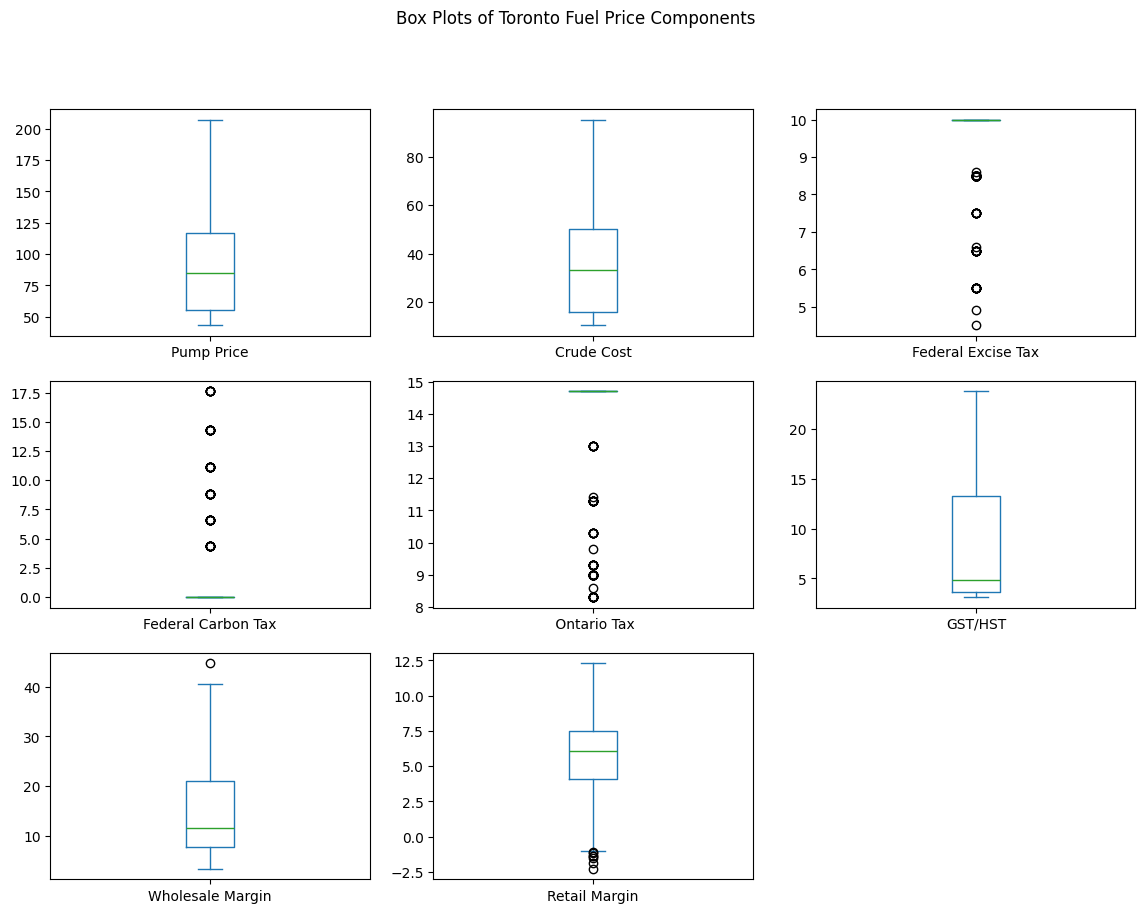

In [13]:

# Histograms
axes = toronto_numeric_data.hist(bins=20, figsize=(14, 10))

# Set labels for each histogram
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Histograms of Toronto Fuel Price Components')
plt.show()

# Box plots
toronto_numeric_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(14, 10), sharex=False, sharey=False)
plt.suptitle('Box Plots of Toronto Fuel Price Components')
plt.show()

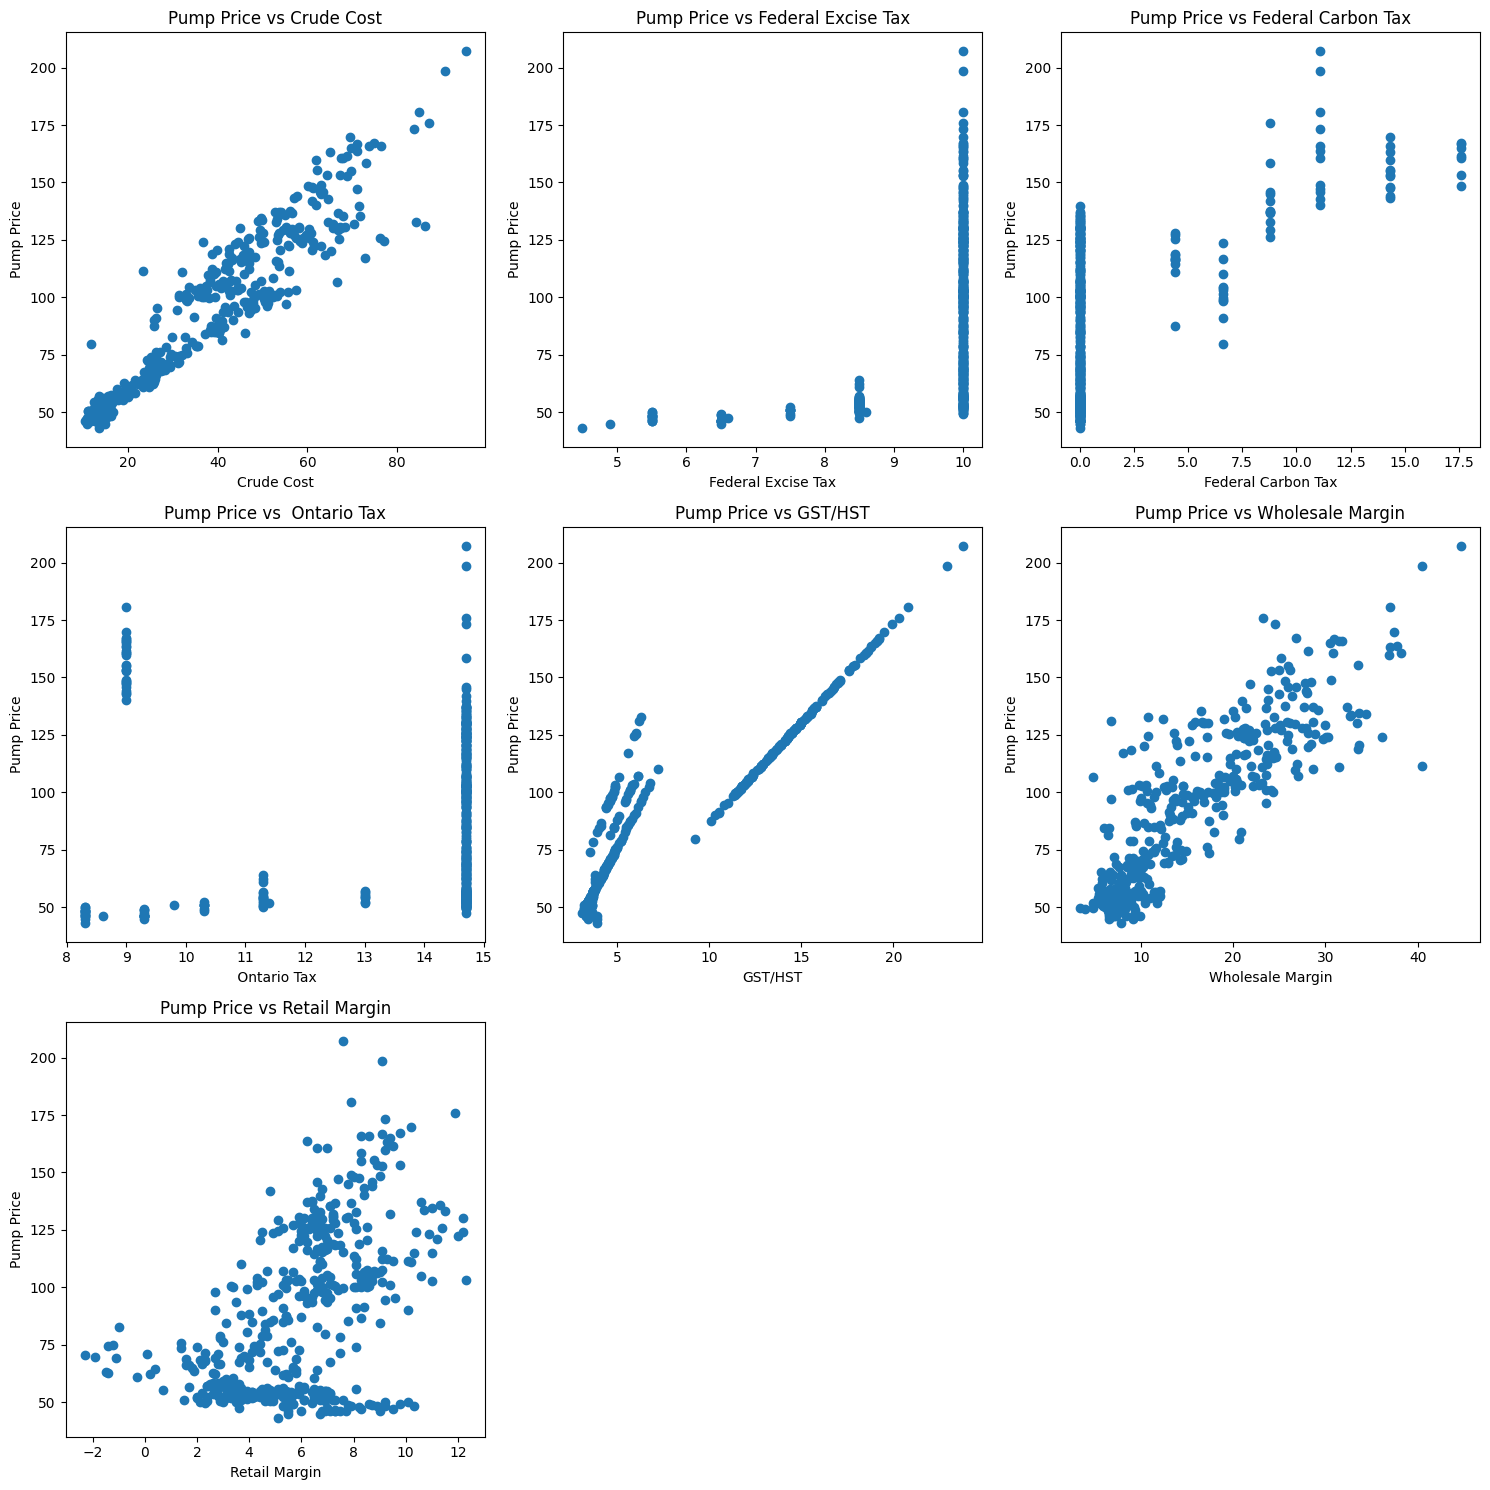

In [17]:
# List of columns to compare with Pump Price
columns_to_compare = ["Crude Cost", "Federal Excise Tax", "Federal Carbon Tax", " Ontario Tax", "GST/HST", "Wholesale Margin", "Retail Margin"]

# Create scatter plots
plt.figure(figsize=(15, 15))

for i, column in enumerate(columns_to_compare):
    plt.subplot(3, 3, i + 1)
    plt.scatter(toronto_numeric_data[column], toronto_numeric_data["Pump Price"])
    plt.xlabel(column)
    plt.ylabel("Pump Price")
    plt.title("Pump Price vs " + column)

plt.tight_layout()
plt.show()
